# Logistic Regression with SUSY
Today, you'll be a physicist, working with collider data to make new particle discoveries! You've been given a small subset of the SUSY Data Set, which contains the results of a simulated experiment to detect supersymmetric particles.

First, let's start off with the necessary imports.

In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Next, we will read in the data and split into training and validation sets.

In [2]:
with open("SUSY_small.csv", "r") as f:
    read = csv.reader(f, delimiter=",")
    x = list(read)
data = np.array([[float(x[i][j]) for j in range(len(x[0]))] for i in range(len(x))])

In [3]:
shuffle = np.arange(data.shape[0])
np.random.shuffle(shuffle)
data_train = data[shuffle[:-1000],:]
data_val = data[shuffle[-1000:],:]
X_train, Y_train = data_train[:,1:], data_train[:,0]
X_val, Y_val = data_val[:,1:], data_val[:,0]

print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(4112, 18) (1000, 18) (4112,) (1000,)


Let's now implement the functions needed to perform gradient descent.

In [4]:
def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X, w)))

def gradient(X, y, w, onept=False, norm=None, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    grad = 0
    if norm == 'l1':
        grad += lamb * np.sign(w)
    if norm == 'l2':
        grad += 2 * lamb * w
    if onept: 
        grad += -((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    else:
        grad += -np.dot(X.T, y - sigmoid(X, w)) / y.size
    return grad

def loss(X, y, w, norm=None, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1 - sigmoid(X[i], w))
    normcost = 0
    if norm == 'l1':
        normcost = lamb * np.sum(np.abs(w))
    if norm == 'l2':
        normcost = lamb * np.linalg.norm(w)**2
    return normcost - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X, w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score

Now that we have the needed functions, we can perform gradient descent to train the model.

In [5]:
theta = np.random.normal(0, 0.1, X_train.shape[1])
losses = []
train_accuracies = []
validation_accuracies = []
epsilon = 0.05
num_iterations = 500

for i in range(num_iterations):
    diff = epsilon * gradient(X_train, Y_train, theta)
    theta = theta - diff
    losses.append(loss(X_train, Y_train, theta))
    train_accuracies.append(accuracy(X_train, Y_train, theta))
    validation_accuracies.append(accuracy(X_val, Y_val, theta))

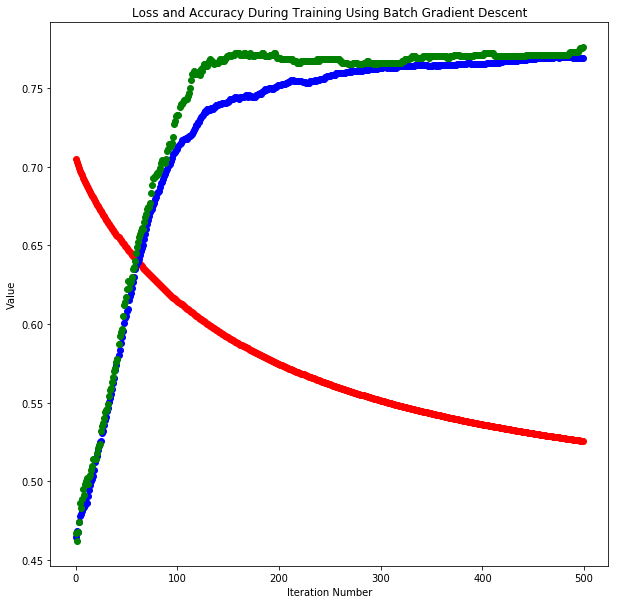

0.7689688715953308


In [6]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(num_iterations), losses, 'ro')
plt.plot(np.arange(num_iterations), train_accuracies, 'bo')
plt.plot(np.arange(num_iterations), validation_accuracies, 'go')
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(X_train, Y_train, theta))

In [7]:
print(accuracy(X_val, Y_val, theta))

0.776


# Logistic Regression with Regularization
What happens when our model overfits? Let's see what we can do to improve our validation accuracy.

In [8]:
X_train_small, Y_train_small = data_train[:50,1:], data_train[:50,0]

In [9]:
theta = np.random.normal(0, 0.1, X_train_small.shape[1])
losses = []
train_accuracies = []
test_accuracies = []

for i in range(num_iterations):
    diff = epsilon * gradient(X_train_small, Y_train_small, theta)
    theta = theta - diff
    losses.append(loss(X_train_small, Y_train_small, theta))
    train_accuracies.append(accuracy(X_train_small, Y_train_small, theta))
    test_accuracies.append(accuracy(X_val, Y_val, theta))

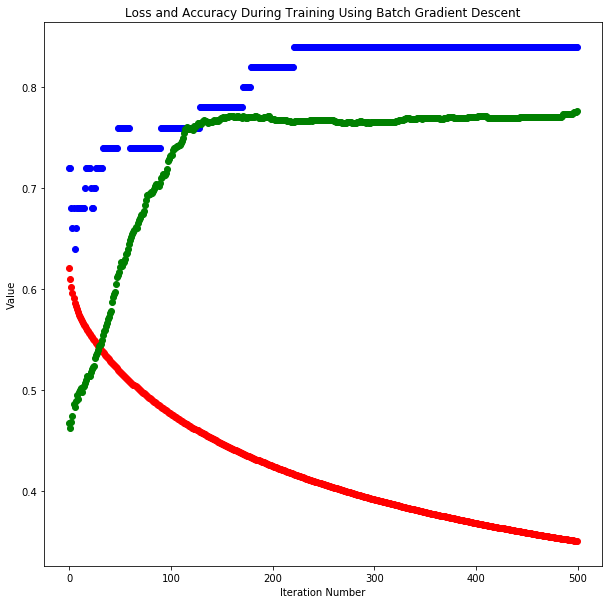

0.84


In [10]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(num_iterations), losses, 'ro')
plt.plot(np.arange(num_iterations), train_accuracies, 'bo')
plt.plot(np.arange(num_iterations), validation_accuracies, 'go')
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(X_train_small, Y_train_small, theta))

In [11]:
print(accuracy(X_val, Y_val, theta))

0.651


Doesn't look so good, huh? Now's lets see what we can do to improve that with regularization.
Note: We are using a relatively simple model, and so for this specific instance may not be very useful.

In [12]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]
norms = ['l1, 'l2'']

for norm in norms:
    print(norm)
    for lamb in lambdas:
        theta = np.random.normal(0, 0.1, X_train_small.shape[1])
        for i in range(num_iterations):
            diff = epsilon * gradient(X_train_small, Y_train_small, theta,
                                      norm=norm,lamb=lamb)
            theta = theta - diff
        train_acc = accuracy(X_train_small, Y_train_small, theta)
        val_acc = accuracy(X_val, Y_val, theta)
        print(lamb)
        print('Training: ' + train_acc + ', Validation: ' + val_acc)
        print()

SyntaxError: invalid syntax (<ipython-input-12-75009badb860>, line 2)

To see what kind of effect regularization is having on the weights, train the model with varying norms and lambdas and print out the parameters.

In [ ]:
print(theta)